# My solution for Q1

In [1]:
import os
import sys

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sys.path.append(os.path.join(os.path.dirname(os.path.abspath('__file__')), '..', 'src'))

In [4]:
import dataset

In [5]:
# global constants
η = 0.01

In [6]:
def indicator(x):
    return int(x)

In [7]:
# loss function J
def J(x, y, w, λ):
    reg = λ * np.linalg.norm(w, ord=2)
    cost = 0
    for i in range(w.shape[0]):
        cost += np.log(1 + np.exp(-y[i]*np.dot(w, x[i,:])))
    return reg + cost

In [8]:
# first-order differentiation of J regarding w
def dJdw(x, y, w, λ):
    regdiff = λ*w
    costdiff = 0
    for i in range(w.shape[0]):
        costdiff += -y[i]*x[i,:] / (1+np.exp(y[i]*np.dot(w, x[i,:])))
    return costdiff + regdiff

In [9]:
dJdw(np.random.rand(100,4), np.random.rand(100), np.random.rand(4), 0.1)

array([-0.25161259, -0.27621451, -0.09935981, -0.40605075])

In [10]:
# second-order differentiation of J regarding w
def d2Jdw2(x, y, w, λ):
    regdiff = λ * np.eye(4)
    costdiff = 0
    for i in range(w.shape[0]):
        e = np.exp(y[i]*np.dot(w, x[i,:]))
        costdiff += - np.matmul(x[i,:], x[i,:].T) * e / (1+e)**2
    return costdiff + regdiff

In [11]:
def optimize(method, x, y, w, λ, η, n):
    for i in range(n):
        w, cost = method(x, y, w, λ, η)
    return w, cost

In [12]:
x, y = dataset.four(100)

## 1. Steepest Gradient Method

In [13]:
def steepest_gradient_method(x, y, w, λ, η):
    cost = J(x, y, w, λ)
    diff = dJdw(x, y, w, λ)
    w = w - η * diff
    return w, cost

In [14]:
w, final_cost = optimize(steepest_gradient_method, x, y, np.random.rand(4), 0.1, η, 100)

In [15]:
print(f"final cost: {final_cost}")

final cost: 1.2324219618156629


## 2. Newton Method

In [16]:
def newton_method(x, y, w, λ, η):
    cost = J(x, y, w, λ)
    diff = dJdw(x, y, w, λ)
    diff2 = d2Jdw2(x, y, w, λ)
    w = w - η * np.matmul(np.linalg.inv(diff2), diff)
    return w, cost

In [17]:
w, final_cost = optimize(newton_method, x, y, np.random.rand(4), 0.1, η, 100)

In [18]:
print(f"final cost: {final_cost}")

final cost: 0.6048869530993759


## 3. compare the methods

In [19]:
costs_steepest = []
costs_newton   = []

w_s = w_n = np.random.rand(4)

for i in range(100):
    w_s, cost = steepest_gradient_method(x, y, w_s, 0.1, η)
    costs_steepest.append(cost)

for i in range(100):
    w_n, cost = newton_method(x, y, w_n, 0.1, η)
    costs_newton.append(cost)
    
costs_steepest = np.stack(costs_steepest)
costs_newton   = np.stack(costs_newton)

In [20]:
ref = costs_newton[-1]
costs_steepest = costs_steepest - ref
costs_newton   = costs_newton   - ref

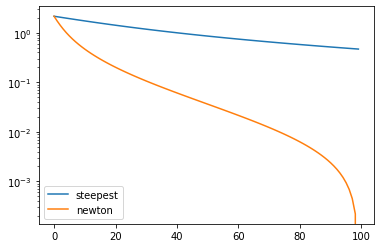

In [21]:
plt.plot(np.abs(costs_steepest), label='steepest')
plt.plot(np.abs(costs_newton), label='newton')
plt.yscale('log')
plt.legend()
plt.show()

## logistic regression

In [22]:
x, y = dataset.five(100)

In [23]:
# loss function J
def J(x, y, w, λ):
    reg = λ * np.linalg.norm(w, ord=2)
    cost = 0
    for i in range(w.shape[0]):
        # MSE loss
        cost += (y[i] - np.dot(w, x[i,:]))**2
    return reg + cost

In [24]:
# first-order differentiation of J regarding w
def dJdw(x, y, w, λ):
    regdiff = λ*w
    costdiff = 0
    for i in range(w.shape[0]):
        costdiff += - 2 * (y[i] - np.dot(w, x[i,:])) * x[i,:]
    return costdiff + regdiff

In [25]:
# second-order differentiation of J regarding w
def d2Jdw2(x, y, w, λ):
    regdiff = λ * np.eye(4)
    costdiff = 0
    for i in range(w.shape[0]):
        costdiff += 2 * np.matmul(x[i,:], x[i,:].T)
    return costdiff + regdiff

In [26]:
w, final_cost = optimize(newton_method, x, y, np.random.rand(4), 0.1, η, 100)

In [27]:
print(f"final cost: {final_cost}")

final cost: 7.413168961242997


In [28]:
w, final_cost = optimize(newton_method, x, y, np.random.rand(4), 0.1, η, 100)

In [29]:
print(f"final cost: {final_cost}")

final cost: 7.428556067643543


In [30]:
costs_steepest = []
costs_newton   = []

w_s = w_n = np.random.rand(4)

for i in range(100):
    w_s, cost = steepest_gradient_method(x, y, w_s, 0.1, η)
    costs_steepest.append(cost)

for i in range(100):
    w_n, cost = newton_method(x, y, w_n, 0.1, η)
    costs_newton.append(cost)
    
costs_steepest = np.stack(costs_steepest)
costs_newton   = np.stack(costs_newton)

In [31]:
ref = costs_newton[-1]
costs_steepest = costs_steepest - ref
costs_newton   = costs_newton   - ref

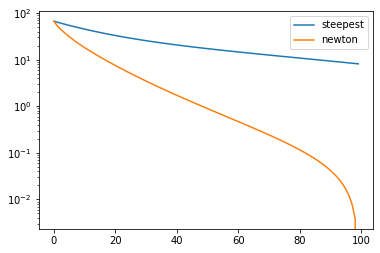

In [32]:
plt.plot(np.abs(costs_steepest), label='steepest')
plt.plot(np.abs(costs_newton), label='newton')
plt.yscale('log')
plt.legend()
plt.show()